<a href="https://colab.research.google.com/github/SAYLIHINGURAO/ANN/blob/main/Street_View_House_Numbers_(_h5_File).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Import Tensorflow
Version of Tensorflow**

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__ 

'2.4.1'

In [2]:
# import Random number Generator
import random
random.seed(0)

In [3]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

**mount the google drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the Datasets**
# Street View House Numbers (.h5 File)
> The Street View House Numbers (SVHN) Dataset

Description

**Context**
> Over 60k Real-World Images of House Numbers From Google 
   Street View Images

**Acknowledgements**
> Stanford University

**Inspiration**
  
1.   Can computers be taught to read images and identify     numbers within it?
2.   Can this act as a starting point for Self-drive        (autopilot)cars to read numbers from road signs ?

 About this file
> This dataset is the shorter version of Stanford SVHN data which comprises of 600k images. While this dataset consists of 42k train, 18k test images.

 **Import packages for H5 format file.** 
> Load the file by copied path of uploaded file

h5py.File act as an dictionary so we can access its keys
>We can examine from this dataset is HDF5 dataset i.e
Hierarchical Data Format version 5 It divides into two parts

X_test,X_train,X_val
y_test,y_train,y_val Total 6 datasets
X_test,X_train,X_val: Shape of this 3 is in 3 Dimensions and its datatype is f4 i.e 'f4' also means 'float32
y_test,y_train,y_val: shape of this 3 in single Dimension and its datatype is u1 i.e U unicode, data type
shape is somewhat similar if you look X & Y 6 datasets

In [5]:
import h5py
h5f= h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5')
print(h5f.keys())
print(type(h5f))

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>
<class 'h5py._hl.files.File'>


In [8]:
X_train= h5f['X_train']
X_test= h5f['X_test']
X_val= h5f['X_val']
y_train= h5f['y_train']
y_test= h5f['y_test']
y_val= h5f['y_val']

**Preprocess the images with labels**

label:{} 8


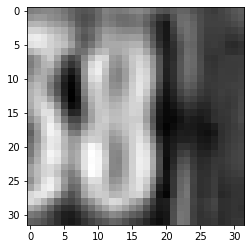

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
print("label:{}",format(y_train[10000]))
plt.imshow(X_train[10000],cmap='gray')

In [10]:
X_test

<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">

In [11]:
X_train

<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">

In [12]:
X_val

<HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">

In [13]:
y_test

<HDF5 dataset "y_test": shape (18000,), type "|u1">

In [14]:
y_train

<HDF5 dataset "y_train": shape (42000,), type "|u1">

In [15]:
y_val

<HDF5 dataset "y_val": shape (60000,), type "|u1">

In [16]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)
(42000,)
(18000,)
(60000,)


In [22]:
import numpy as np
X_test=np.array([X_test])
X_train=np.array([X_train])
X_val=np.array([X_val])
y_test=np.array([y_test])
y_train=np.array([y_train])
y_val=np.array([y_val])


In [23]:
X_test

array([[[[[[[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153,
              112.9904, 112.1646],
             [ 39.4379,  44.2911,  47.1768, ..., 111.0122,
              110.9475, 109.9368],
             [ 38.4488,  43.6394,  48.7098, ..., 109.8921,
              109.9414, 109.1048],
             ...,
             [ 34.9869,  35.4707,  39.6676, ..., 109.211 ,
              109.9074, 112.7346],
             [ 35.6602,  35.5462,  40.3193, ..., 110.9998,
              112.049 , 114.3431],
             [ 36.1871,  35.4214,  40.6998, ..., 110.0169,
              111.2017, 114.1906]],

            [[115.1609, 114.161 , 113.1611, ..., 112.0302,
              112.6711, 112.7851],
             [110.5743, 110.2754, 108.9766, ..., 106.1448,
              106.7857, 107.0137],
             [102.8031, 102.5042, 101.7924, ...,  95.776 ,
               95.531 ,  95.645 ],
             ...,
             [169.8457, 170.6176, 167.8028, ...,  45.1708,
               55.6967,  62.81  ],
             [157.7329

In [26]:
X_train

array([[[[[[[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,
               58.2204,  42.9939],
             [ 25.2283,  25.5533,  29.9765, ..., 113.0209,
              103.3639,  84.2949],
             [ 26.2775,  22.6137,  40.4763, ..., 113.3028,
              121.775 , 115.4228],
             ...,
             [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,
               25.0927,  26.0603],
             [ 38.4352,  26.4733,  23.2717, ...,  28.1094,
               29.4683,  30.0661],
             [ 50.2984,  26.0773,  24.0389, ...,  49.6682,
               50.853 ,  53.0377]],

            [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,
               89.7477,  92.5302],
             [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,
               87.204 ,  88.5629],
             [ 85.9654,  85.8145,  85.9239, ...,  63.8626,
               59.8199,  54.8805],
             ...,
             [ 90.2236,  91.0448,  93.4637, ...,  55.3535,
               48.5822,  44.0557],
             [ 90.6427

In [27]:
X_val

array([[[[[[ 44.299 ,  45.9999,  51.3306, ...,  25.2764,  27.515 ,
             27.156 ],
           [ 49.1351,  60.3081,  70.1222, ...,  23.7002,  25.2378,
             24.2918],
           [ 60.7595,  83.7141, 102.1961, ...,  24.5044,  24.9712,
             22.8512],
           ...,
           [ 67.1072,  93.2464, 109.2017, ...,  26.6444,  24.6015,
             22.9607],
           [ 24.7569,  36.6417,  48.9071, ...,  21.9268,  21.5309,
             21.5479],
           [ 22.6584,  22.7724,  27.2666, ...,  21.443 ,  20.8191,
             20.0812]],

          [[ 66.174 ,  66.2772,  67.5652, ...,  63.1545,  81.6751,
            103.6083],
           [ 69.8424,  67.7178,  66.3481, ...,  55.8994,  69.8935,
             93.4244],
           [ 67.8489,  67.6532,  66.2835, ...,  57.3445,  70.3495,
             92.7665],
           ...,
           [ 70.7993,  64.7613,  62.652 , ...,  71.0335,  94.8695,
            114.3038],
           [ 68.3094,  64.4561,  63.3036, ...,  71.0335,  94.3965,

In [28]:
y_test

array([[[[1, 7, 2, ..., 7, 9, 2]]]], dtype=uint8)

In [29]:
y_train

array([[[[2, 6, 7, ..., 7, 0, 4]]]], dtype=uint8)

In [30]:
y_val

array([[[[0, 0, 0, ..., 9, 9, 9]]]], dtype=uint8)

In [25]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)
print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(1, 1, 1, 1, 1, 18000, 32, 32)
(1, 1, 1, 1, 1, 42000, 32, 32)
(1, 1, 1, 60000, 32, 32)
(1, 1, 1, 18000)
(1, 1, 1, 42000)
(1, 1, 1, 60000)


**Normalizing the image
o to 255 colour scale for computer**

In [31]:
print('Max',X_train.max())
print('Min',X_train.min())
#254.9745 i.e 255

Max 254.9745
Min 0.0


In [32]:
#Normalising of dataset
X_train=X_train/255
X_val=X_val/255
print(X_train.max())
print(X_val.min())

0.9999
0.0


# 0.9999 i.e 1

**Reshape is nothing but rescaling data converting or transformation of 3- D to 2-D shape**

In [33]:
X_test=X_test.reshape(18000,1024)
X_train=X_train.reshape(42000,1024)
X_val=X_val.reshape(60000,1024)
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

(18000, 1024)
(42000, 1024)
(60000, 1024)


**one-hot encode the class vector
Convert 
list item**

In [34]:
y_train =tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val,num_classes=10)

Label for the below image: 2


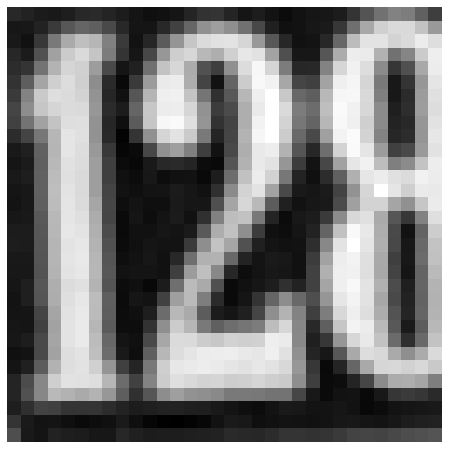

In [49]:
#visualizing the first 10 images and their labels
plt.figure(figsize=(8, 8))
x=[]
for i in range(1):
  plt.subplot(1, 1, i+1)
  plt.imshow(X_train[i].reshape(32,32), cmap="gray")
  plt.axis('off')
  print('Label for the below image: %s' % (np.argmax(y_train[0:1][i])))
  plt.show()

**Create a Model**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Flatten
model =Sequential()
model.add(Flatten())
model.add(Dense(500, activation="relu")) 
model.add(Dense(10, activation="softmax"))

**Compile the Model**

In [44]:
model.compile(optimizer= 'adam' , loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
y_train=y_train.reshape(42000,10)
y_val=y_val.reshape(60000,10)
print(y_train.shape)
print(y_val.shape)

(42000, 1024)
(1, 1, 1, 42000, 10)
(60000, 1024)
(1, 1, 1, 60000, 10)
(42000, 10)
(60000, 10)


**Train the Model**

In [62]:
model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3289 - accuracy: 0.1159 - val_loss: 2.1208 - val_accuracy: 0.1779
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.0652 - accuracy: 0.2357 - val_loss: 1.9460 - val_accuracy: 0.3020
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.9335 - accuracy: 0.2958 - val_loss: 1.8952 - val_accuracy: 0.3035
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.8815 - accuracy: 0.3062 - val_loss: 1.8601 - val_accuracy: 0.3185
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.8518 - accuracy: 0.3190 - val_loss: 1.8570 - val_accuracy: 0.3185
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.8498 - accuracy: 0.3178 - val_loss: 1.8314 - val_accuracy: 0.3281
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.8384 - accuracy: 0.3207 - val_loss: 1.8318 - val_accuracy

**Evaluate the model**

In [63]:
model.evaluate(X_train,y_train)

1313/1313 [==============================] - 3s 2ms/step - loss: 1.8156 - accuracy: 0.3297


[1.8156013488769531, 0.3297380805015564]